## 1. Malicious PDF Feature Analysis.
    TODO: everything

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.mlab as mlab

In [3]:
pentropy = pd.read_csv('data/sorted-entropy-features-vs251.csv')
pfileid = pd.read_csv('data/sorted-file-id-features-vs251.csv')
plabels = pd.read_csv('data/sorted-train-labels-vs251.csv')
pentropy.head()

,file_name,entropy,file_size
0,00027c21667d9119a454df8cef2dc1c7,0.666599,18390
1,0003887ab64b8ae19ffa988638decac2,0.903260,1134320
2,0004376a62e22f6ad359467eb742b8ff,0.803515,149720
3,000634f03457d088c71dbffb897b1315,0.957584,1725502
4,00072ed24314e91b63b425b3dc572f50,0.486112,328093


In [4]:
pfileid.head()

,file_name,file_type,file_id
0,00027c21667d9119a454df8cef2dc1c7,HTML document UTF-8 Unicode text with very lon...,38
1,0003887ab64b8ae19ffa988638decac2,PE32 executable (DLL) (console) Intel 80386 Mo...,25
2,0004376a62e22f6ad359467eb742b8ff,PE32 executable (GUI) Intel 80386 for MS Windows,1
3,000634f03457d088c71dbffb897b1315,PE32 executable (GUI) Intel 80386 for MS Windows,1
4,00072ed24314e91b63b425b3dc572f50,PE32 executable (GUI) Intel 80386 for MS Windows,1


In [5]:
plabels.head()

,file_name,malware_type_x,sample_label,family_name,family_label
0,00027c21667d9119a454df8cef2dc1c7,Trojan:JS/Redirector.QE,4,JS.Trojan.Redirector,4
1,0003887ab64b8ae19ffa988638decac2,OK,0,unknown,0
2,0004376a62e22f6ad359467eb742b8ff,Worm:Win32/Picsys.C,6,Win32.Worm.Picsys,6
3,000634f03457d088c71dbffb897b1315,Worm:Win32/Rebhip,9,Win32.Worm.Rebhip,9
4,00072ed24314e91b63b425b3dc572f50,VirTool:Win32/VBInject.UG,10,Win32.VirTool.VBInject,10


In [8]:
ftypes = pfileid['file_type']
pdf_files = []
for idx, ftype in enumerate(ftypes):
    if 'Port' in ftype:
        pdf_files.append(pfileid.iloc[idx, 0])
        
print("Found {:d} PDF files.".format(len(pdf_files)))

Found 0 PDF files.


In [2]:
pfeat = pd.read_csv('data/3589-pdf-features-legit.csv')
pfeat.head()

,file_name,/$iA#Rosl$&Q,/*6Pm,/*cD,//Amazon.com,//DnLG%Ak,//Esquire.com,//Foragerpress.com,//KI4U.com,//Tomdispatch.com,...,/z/parenright/h,/z/s,/zcaron,/zero,endbfrange,endcmap,endcodespacerange,endobj,endstr,endstream
0,/opt/vs/pdfset/How security flaws work the buf...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1,/opt/vs/pdfset/Mathematical Puzzles for the Co...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1,0
2,/opt/vs/pdfset/Modern Pioneer - May 2015 USA.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3,/opt/vs/pdfset/Universal Principles of Design ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,799,647,0
4,/opt/vs/pdfset/You Can Have an Amazing Memory ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,6,6,930,248,0


In [3]:
pfeat.shape

(119, 2755)

In [ ]:
plabel = pd.read_csv('data/no-labels-yet.csv')

## 2. Reduce the Feature Set with Chi2 Tests.

In [5]:
X = pfeat.iloc[:,1:]
y = np.random.randint(0, 4, 119)

In [ ]:
# find the top 10 percent variance features, from 1006 -> 101 features
fsp = SelectPercentile(chi2, 10)
X_new_10 = fsp.fit_transform(X,y)
X_new_10.shape

In [6]:
y

array([1, 3, 1, 2, 3, 3, 1, 1, 0, 0, 3, 0, 3, 1, 3, 3, 1, 3, 1, 0, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 2, 3, 3, 1, 1, 1, 2, 0, 3, 1, 1, 1, 3, 3, 3, 0, 0,
       0, 1, 0, 3, 1, 2, 3, 0, 0, 1, 1, 2, 1, 0, 2, 3, 0, 2, 2, 0, 3, 3, 0,
       0, 2, 3, 3, 2, 3, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 3, 3, 1, 0, 2, 3, 0,
       2, 3, 3, 0, 2, 3, 3, 2, 3, 0, 0, 3, 0, 3, 0, 1, 0, 1, 1, 0, 3, 3, 1,
       0, 3, 0, 0])

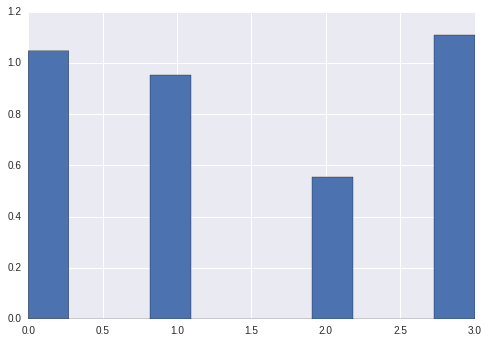

In [7]:
plt.hist(y, 11, normed=True)
plt.show()